In [34]:
import pandas as pd
import matplotlib
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
BAY_AREA = ['Alameda','Contra Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma']
# poplation data from https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-06.xlsx
POPULATION = [1671329,1153526,258826,137744,881549,766573,1927852,447643,494336]
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv", header=0)

# https://abc7news.com/governor-newsom-phases-to-reopen-guidelines-update-today-gavin-coronavirus/6157906/
# No more than one new COVID-19 case per 10,000 residents in the past 14 days
# No COVID-19 deaths in the past 14 days

In [35]:
ca_df_mar = df[(df['state']=='California')&(df['date'] > '2021-01-01')]
# ca_df_mar

In [36]:
by_county_by_date = ca_df_mar.pivot_table(index='date', columns='county',values='cases', fill_value=0)[BAY_AREA]

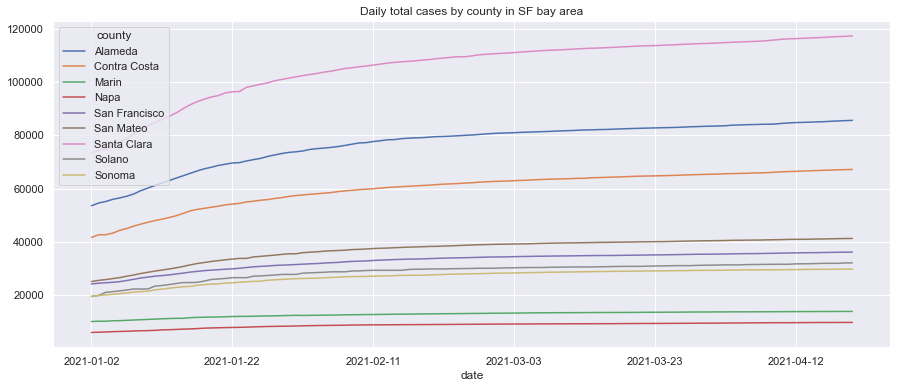

In [37]:
by_county_by_date.plot.line(figsize=(15,6), title='Daily total cases by county in SF bay area')

In [38]:
by_county_by_date_diff = by_county_by_date.diff().iloc[1:]
pop_dic = {}
for name, pop in zip(BAY_AREA, POPULATION):
    pop_dic[name] = pop
pop_dic

{'Alameda': 1671329,
 'Contra Costa': 1153526,
 'Marin': 258826,
 'Napa': 137744,
 'San Francisco': 881549,
 'San Mateo': 766573,
 'Santa Clara': 1927852,
 'Solano': 447643,
 'Sonoma': 494336}

In [61]:
yellow_level = 2
yellow_dic = {k: (yellow_level * v/100000) for k,v in pop_dic.items()}
yellow_dic

{'Alameda': 33.42658,
 'Contra Costa': 23.07052,
 'Marin': 5.17652,
 'Napa': 2.75488,
 'San Francisco': 17.63098,
 'San Mateo': 15.33146,
 'Santa Clara': 38.55704,
 'Solano': 8.95286,
 'Sonoma': 9.88672}

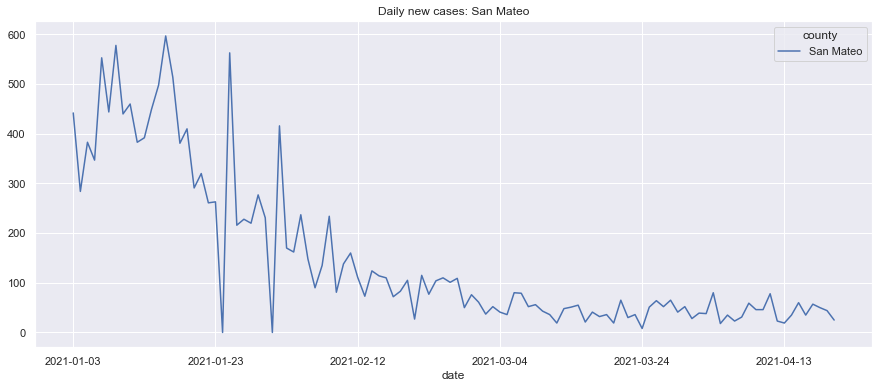

In [57]:
county = 'San Mateo'
by_county_by_date_diff[[county]].plot.line(stacked=True, figsize=(15,6), title='Daily new cases: {}'.format(county))

In [63]:
# Last 14 days new cases
print("{} should be less than {}".format(county, yellow_dic[county]))
print(by_county_by_date_diff[[county]].iloc[-1:,:].sum())

San Mateo should be less than 15.33146
county
San Mateo    25.0
dtype: float64


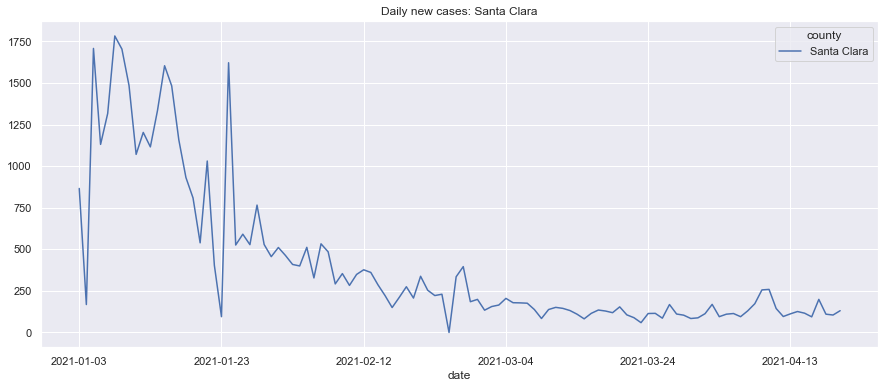

In [64]:
county = 'Santa Clara'
by_county_by_date_diff[[county]].plot.line(stacked=True, figsize=(15,6), title='Daily new cases: {}'.format(county))

In [65]:
# Last 14 days new cases
print("{} should be less than {}".format(county, yellow_dic[county]))
print(by_county_by_date_diff[[county]].iloc[-1:,:].sum())

Santa Clara should be less than 38.55704
county
Santa Clara    131.0
dtype: float64


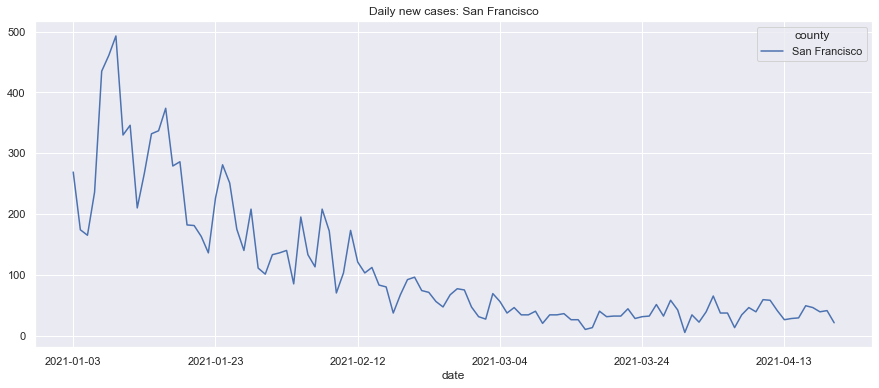

In [66]:
county = 'San Francisco'
by_county_by_date_diff[[county]].plot.line(figsize=(15,6), title='Daily new cases: {}'.format(county))

In [67]:
print("{} should be less than {}".format(county, yellow_dic[county]))
print(by_county_by_date_diff[[county]].iloc[-1:,:].sum())

San Francisco should be less than 17.63098
county
San Francisco    21.0
dtype: float64


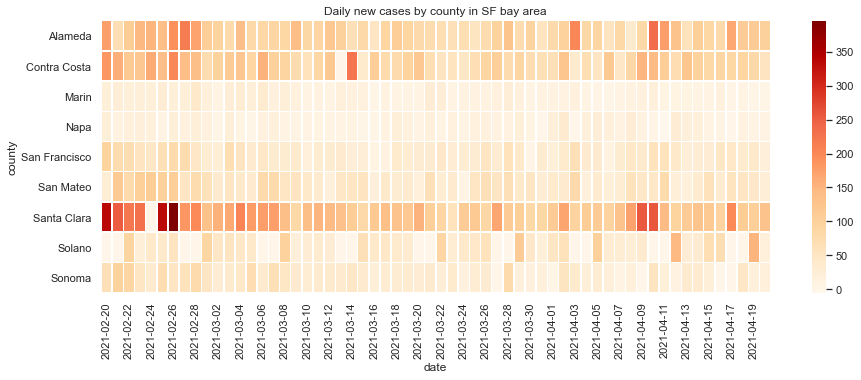

In [68]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Daily new cases by county in SF bay area')
sns.heatmap(by_county_by_date_diff[-60:].T, cmap="OrRd",linewidths=.5, ax=ax)

In [69]:
death_by_county_by_date = ca_df_mar.pivot_table(index='date', columns='county',values='deaths', fill_value=0)[BAY_AREA]
# death_by_county_by_date

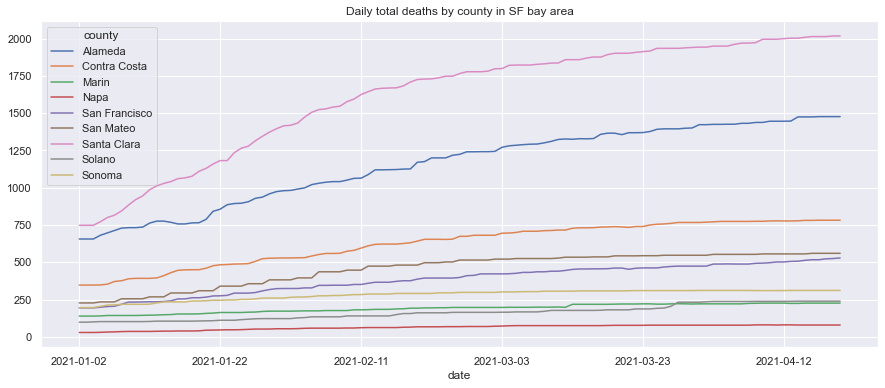

In [70]:
death_by_county_by_date.plot.line(figsize=(15,6), title='Daily total deaths by county in SF bay area')

In [71]:
death_by_county_by_date_diff = death_by_county_by_date.diff().iloc[1:]
# death_by_county_by_date_diff

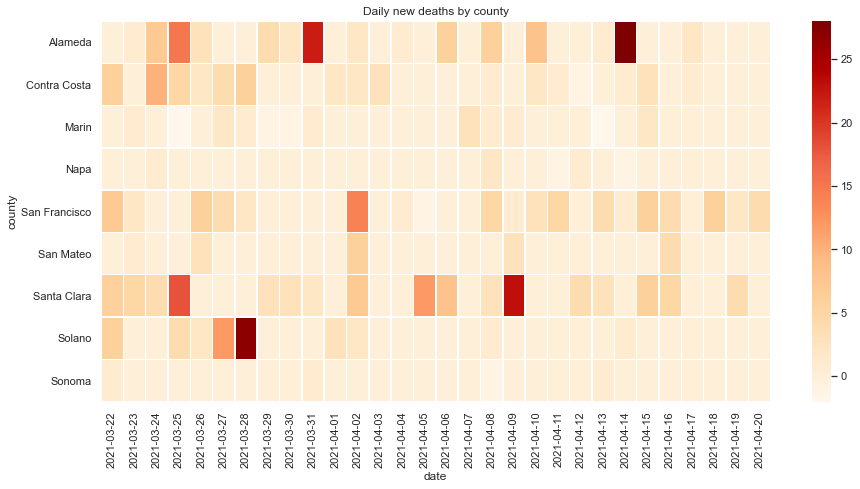

In [72]:
fig6, ax6 = plt.subplots(figsize=(15,7))
ax6.set_title('Daily new deaths by county')
sns.heatmap(death_by_county_by_date_diff[-30:].T, cmap="OrRd",linewidths=.5, ax=ax6)

In [73]:
state_df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv", header=0)
# state_df

In [74]:
state_df_mar = state_df[state_df['date'] > '2020-02-28']
# state_df_mar

In [75]:
by_state_by_date = state_df_mar.pivot_table(index='date', columns='state',values='deaths', fill_value=0)
# by_state_by_date

In [76]:
by_state_by_date_diff = by_state_by_date.diff().iloc[1:]
# by_state_by_date_diff

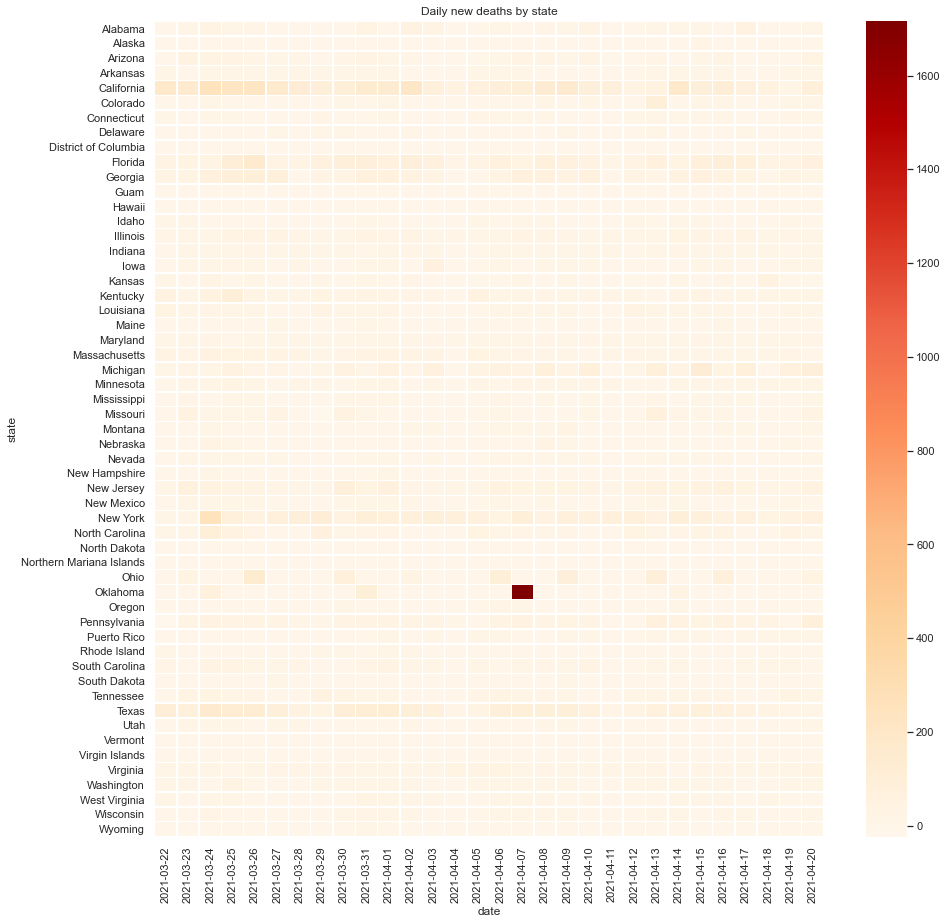

In [77]:
fig5, ax5 = plt.subplots(figsize=(15,15))
ax5.set_title('Daily new deaths by state')
sns.heatmap(by_state_by_date_diff[-30:].T, cmap="OrRd",linewidths=.5, ax=ax5)

In [78]:
by_state_by_date_cases = state_df_mar.pivot_table(index='date', columns='state',values='cases', fill_value=0)
# by_state_by_date
by_state_by_date_cases_diff = by_state_by_date_cases.diff().iloc[1:]

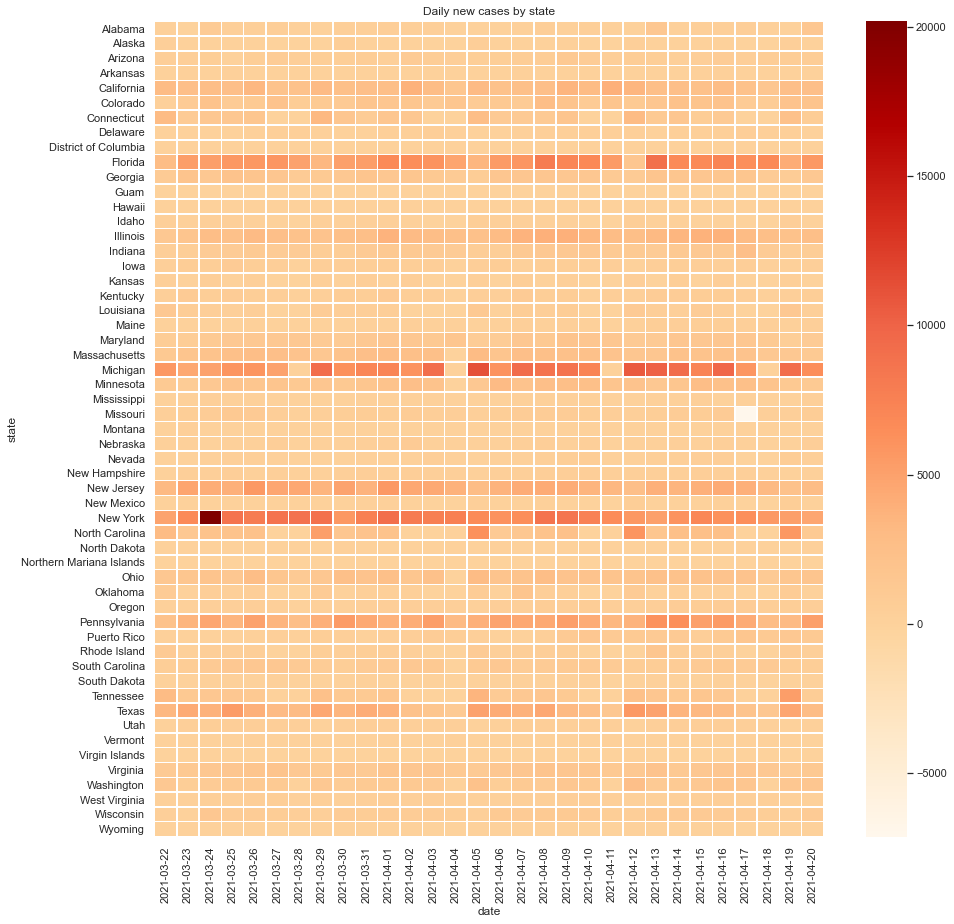

In [80]:
fig4, ax4 = plt.subplots(figsize=(15,15))
ax4.set_title('Daily new cases by state')
sns.heatmap(by_state_by_date_cases_diff[-30:].T, cmap="OrRd",linewidths=.5, ax=ax4)